In [1]:
import os
import pandas as pd

from qsprpred.data import QSPRDataset, RandomSplit
from qsprpred.data.descriptors.fingerprints import MorganFP
from qsprpred.data.descriptors.sets import SmilesDesc

os.makedirs("/home/s2861704/ppk/test_kin/test_output/qsprst/data", exist_ok=True)

df=pd.read_csv('/home/s2861704/ppk/test_kin/prep_storage/K200_EGFR_TEST.csv', sep=',')
display(df)
print(df['target_id'].unique())

,Activity_ID,Quality,source,CID,SMILES,connectivity,InChIKey,InChI,InChI_AuxInfo,target_id,...,Activity_class,relation,pchembl_value,pchembl_value_Mean,pchembl_value_StdDev,pchembl_value_SEM,pchembl_value_N,pchembl_value_Median,pchembl_value_MAD,Classification
0,AAAAZQPHATYWOK_on_P00533_WT,High,ChEMBL31;Sharma2016;Sharma2016,ChEMBL31.compound.33854;4277046;4277046,CCOc1cc2ncc(C#N)c(Nc3ccc(OCc4nc5ccccc5s4)c(Cl)...,AAAAZQPHATYWOK,AAAAZQPHATYWOK-UHFFFAOYSA-N,InChI=1S/C32H29ClN6O3S/c1-4-41-28-16-25-22(15-...,"""AuxInfo=1/1/N:1,17,18,2,34,33,14,35,32,13,38,...",P00533_WT,...,NaN,=,6.730; 6.726; 6.063,6.506,0.313000,0.222,3.0,6.726,0.004,Enzyme->Kinase->Protein Kinase->TK protein kin...
1,AAEPFBULPJOZCS_on_P00533_WT,High,Sharma2016,10064954,C=CC(=O)Nc1cccc(-n2c(=O)cc(C)c3cnc(Nc4cn(C)nc4...,AAEPFBULPJOZCS,AAEPFBULPJOZCS-UHFFFAOYSA-N,InChI=1S/C22H18F3N7O2/c1-4-17(33)27-13-6-5-7-1...,"""AuxInfo=1/1/N:1,16,25,2,8,7,9,14,34,33,23,15,...",P00533_WT,...,NaN,=,7.276,7.276,0.000000,0.000,1.0,7.276,0.000,Enzyme->Kinase->Protein Kinase->TK protein kin...
2,AAFHSECTTHOVFV_on_P00533_WT,High,Sharma2016,4486432,COc1cc(N2CCN(C)CC2)ccc1Nc1ncc2c(n1)N(c1cccc(N)...,AAFHSECTTHOVFV,AAFHSECTTHOVFV-UHFFFAOYSA-N,InChI=1S/C25H30N8O2/c1-30-9-11-32(12-10-30)19-...,"""AuxInfo=1/1/N:32,14,1,23,22,24,26,25,30,33,29...",P00533_WT,...,NaN,=,6.321; 5.311; 4.952,5.528,0.580000,0.410,3.0,5.311,0.359,Enzyme->Kinase->Protein Kinase->TK protein kin...
3,AAGKMGNYUYCEPD_on_P00533_WT,High,ChEMBL31,ChEMBL31.compound.183555,CC(=O)NCCn1ccc2ncnc(Nc3ccc(Oc4cccc5sncc45)c(Cl...,AAGKMGNYUYCEPD,AAGKMGNYUYCEPD-UHFFFAOYSA-N,InChI=1S/C23H19ClN6O2S/c1-14(31)25-8-10-30-9-7...,"""AuxInfo=1/1/N:1,22,21,23,30,29,9,5,8,6,15,26,...",P00533_WT,...,NaN,=,8.540,8.540,0.000000,0.000,1.0,8.540,0.000,Enzyme->Kinase->Protein Kinase->TK protein kin...
4,AAHKGRWRYBCWDL_on_P00533_WT,High,Sharma2016,4358384,CCOc1ccc(-c2nn(C3CCCC3)c3ncnc(N)c23)cc1OC,AAHKGRWRYBCWDL,AAHKGRWRYBCWDL-UHFFFAOYSA-N,InChI=1S/C19H23N5O2/c1-3-26-14-9-8-12(10-15(14...,"""AuxInfo=1/1/N:1,7,2,15,16,14,17,25,26,8,23,9,...",P00533_WT,...,NaN,=,5.854,5.854,0.000000,0.000,1.0,5.854,0.000,Enzyme->Kinase->Protein Kinase->TK protein kin...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15998,ZZKJYWJMKZJTKA_on_P04626_WT,High,ChEMBL31,ChEMBL31.compound.221773,NS(=O)(=O)CCNCc1ccc(-c2ccc3ncnc(Nc4ccc(OCc5ccc...,ZZKJYWJMKZJTKA,ZZKJYWJMKZJTKA-UHFFFAOYSA-N,InChI=1S/C28H25ClFN5O4S/c29-24-14-21(5-8-27(24...,"""AuxInfo=1/1/N:31,30,32,14,37,10,15,36,11,6,5,...",P04626_WT,...,NaN,=,8.41,8.410,0.000000,0.000,1.0,8.410,0.000,Enzyme->Kinase->Protein Kinase->TK protein kin...
15999,ZZRGSHVUZJRFKX_on_P00533_WT,High,ChEMBL31,ChEMBL31.compound.85261;4348271,NC1CCN(Cc2ccn3ncnc(Nc4ccc(OCc5cccc(F)c5)c(Cl)c...,ZZRGSHVUZJRFKX,ZZRGSHVUZJRFKX-UHFFFAOYSA-N,InChI=1S/C25H26ClFN6O/c26-22-13-21(4-5-23(22)3...,"""AuxInfo=1/1/N:20,19,21,26,25,32,3,34,4,33,31,...",P00533_WT,...,NaN,=,7.42;7.42,7.420,0.000000,0.000,2.0,7.420,0.000,Enzyme->Kinase->Protein Kinase->TK protein kin...
16000,ZZRGSHVUZJRFKX_on_P04626_WT,High,ChEMBL31,ChEMBL31.compound.85261,NC1CCN(Cc2ccn3ncnc(Nc4ccc(OCc5cccc(F)c5)c(Cl)c...,ZZRGSHVUZJRFKX,ZZRGSHVUZJRFKX-UHFFFAOYSA-N,InChI=1S/C25H26ClFN6O/c26-22-13-21(4-5-23(22)3...,"""AuxInfo=1/1/N:20,19,21,26,25,32,3,34,4,33,31,...",P04626_WT,...,NaN,=,7.5,7.500,0.000000,0.000,1.0,7.500,0.000,Enzyme->Kinase->Protein Kinase->TK protein kin...
16001,ZZYCYTFKFSOZMZ_on_P17948_WT,High,ChEMBL31,ChEMBL31.compound.56356,COc1ccc(Nc2nnc(-c3cccnc3CCc3ccncc3)o2)cc1OC,ZZYCYTFKFSOZMZ,ZZYCYTFKFSOZMZ-UHFFFAOYSA-N,InChI=1S/C22H21N5O3/c1-28-19-8-6-16(14-20(19)2...,"""AuxInfo=1/1/N:1,30,14,13,19,5,18,4,21,25,15,2...",P17948_WT,...,NaN,=,6.75,6.750,0.000000,0.000,1.0,6.750,0.000,Enzyme->Kinase->Protein Kinase->TK protein kin...


['P00533_WT' 'P04626_WT' 'P35968_WT' 'P17948_WT' 'P35916_WT' 'Q15303_WT']


In [8]:
df=df[df['target_id']== 'P00533_WT']
display(df)

,Activity_ID,Quality,source,CID,SMILES,connectivity,InChIKey,InChI,InChI_AuxInfo,target_id,...,pchembl_value_Mean,pchembl_value_StdDev,pchembl_value_SEM,pchembl_value_N,pchembl_value_Median,pchembl_value_MAD,Classification,QSPRID,pchembl_value_Mean_original,Split_IsTrain
QSPRID,,,,,,,,,,,,,,,,,,,,,
QSPRSTTestDataset_0000,AAAAZQPHATYWOK_on_P00533_WT,High,ChEMBL31;Sharma2016;Sharma2016,ChEMBL31.compound.33854;4277046;4277046,CCOc1cc2ncc(C#N)c(Nc3ccc(OCc4nc5ccccc5s4)c(Cl)...,AAAAZQPHATYWOK,AAAAZQPHATYWOK-UHFFFAOYSA-N,InChI=1S/C32H29ClN6O3S/c1-4-41-28-16-25-22(15-...,"""AuxInfo=1/1/N:1,17,18,2,34,33,14,35,32,13,38,...",P00533_WT,...,6.50600,0.313000,0.222000,3.0,6.7260,0.0040,Enzyme->Kinase->Protein Kinase->TK protein kin...,QSPRSTTestDataset_0000,6.50600,True
QSPRSTTestDataset_0001,AAEPFBULPJOZCS_on_P00533_WT,High,Sharma2016,10064954,C=CC(=O)Nc1cccc(-n2c(=O)cc(C)c3cnc(Nc4cn(C)nc4...,AAEPFBULPJOZCS,AAEPFBULPJOZCS-UHFFFAOYSA-N,InChI=1S/C22H18F3N7O2/c1-4-17(33)27-13-6-5-7-1...,"""AuxInfo=1/1/N:1,16,25,2,8,7,9,14,34,33,23,15,...",P00533_WT,...,7.27600,0.000000,0.000000,1.0,7.2760,0.0000,Enzyme->Kinase->Protein Kinase->TK protein kin...,QSPRSTTestDataset_0001,7.27600,True
QSPRSTTestDataset_0002,AAFHSECTTHOVFV_on_P00533_WT,High,Sharma2016,4486432,COc1cc(N2CCN(C)CC2)ccc1Nc1ncc2c(n1)N(c1cccc(N)...,AAFHSECTTHOVFV,AAFHSECTTHOVFV-UHFFFAOYSA-N,InChI=1S/C25H30N8O2/c1-30-9-11-32(12-10-30)19-...,"""AuxInfo=1/1/N:32,14,1,23,22,24,26,25,30,33,29...",P00533_WT,...,5.52800,0.580000,0.410000,3.0,5.3110,0.3590,Enzyme->Kinase->Protein Kinase->TK protein kin...,QSPRSTTestDataset_0002,5.52800,True
QSPRSTTestDataset_0003,AAGKMGNYUYCEPD_on_P00533_WT,High,ChEMBL31,ChEMBL31.compound.183555,CC(=O)NCCn1ccc2ncnc(Nc3ccc(Oc4cccc5sncc45)c(Cl...,AAGKMGNYUYCEPD,AAGKMGNYUYCEPD-UHFFFAOYSA-N,InChI=1S/C23H19ClN6O2S/c1-14(31)25-8-10-30-9-7...,"""AuxInfo=1/1/N:1,22,21,23,30,29,9,5,8,6,15,26,...",P00533_WT,...,8.54000,0.000000,0.000000,1.0,8.5400,0.0000,Enzyme->Kinase->Protein Kinase->TK protein kin...,QSPRSTTestDataset_0003,8.54000,True
QSPRSTTestDataset_0004,AAHKGRWRYBCWDL_on_P00533_WT,High,Sharma2016,4358384,CCOc1ccc(-c2nn(C3CCCC3)c3ncnc(N)c23)cc1OC,AAHKGRWRYBCWDL,AAHKGRWRYBCWDL-UHFFFAOYSA-N,InChI=1S/C19H23N5O2/c1-3-26-14-9-8-12(10-15(14...,"""AuxInfo=1/1/N:1,7,2,15,16,14,17,25,26,8,23,9,...",P00533_WT,...,5.85400,0.000000,0.000000,1.0,5.8540,0.0000,Enzyme->Kinase->Protein Kinase->TK protein kin...,QSPRSTTestDataset_0004,5.85400,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
QSPRSTTestDataset_8645,ZZYRBJVUKKZJCS_on_P00533_WT,High,Sharma2016,10038801,C=CC(=O)Nc1cccc(Nc2ncc3ncc(=O)n(-c4ccc(OC)cc4)...,ZZYRBJVUKKZJCS,ZZYRBJVUKKZJCS-UHFFFAOYSA-N,InChI=1S/C22H18N6O3/c1-3-19(29)25-14-5-4-6-15(...,"""AuxInfo=1/1/N:1,28,2,8,7,9,24,30,25,29,31,16,...",P00533_WT,...,5.77100,0.144000,0.144000,2.0,5.7710,0.1440,Enzyme->Kinase->Protein Kinase->TK protein kin...,QSPRSTTestDataset_8645,5.77100,False
QSPRSTTestDataset_8646,ZZYYXBZDNMSOPZ_on_P00533_WT,High,ChEMBL31,ChEMBL31.compound.366453,Cc1nc(C)c(C=C2CC(C)CC(=Cc3nc(C)c(C)nc3C)C2=NO)...,ZZYYXBZDNMSOPZ,ZZYYXBZDNMSOPZ-UHFFFAOYSA-N,InChI=1S/C23H29N5O/c1-12-8-19(10-21-17(6)24-13...,"""AuxInfo=1/0/N:11,1,20,4,22,28,17,9,12,7,14,10...",P00533_WT,...,5.62000,0.000000,0.000000,1.0,5.6200,0.0000,Enzyme->Kinase->Protein Kinase->TK protein kin...,QSPRSTTestDataset_8646,5.62000,False
QSPRSTTestDataset_8647,ZZBAYSXOXCZQAE_on_P00533_WT,High,Sharma2016,4304126;4304126;ChEMBL31.compound.57209;ChEMBL...,COc1cc2ncnc(Nc3cccc(Cl)c3F)c2cc1CN1CCCC1C(=O)N...,ZZBAYSXOXCZQAE,ZZBAYSXOXCZQAE-UHFFFAOYSA-N,InChI=1S/C23H25ClFN5O2/c1-29(2)23(31)19-8-5-9-...,"""AuxInfo=1/1/N:14,15,1,26,8,25,27,9,7,16,32,5,...",P00533_WT,...,6.18475,0.189088,0.094544,4.0,6.1845,0.1635,Enzyme->Kinase->Protein Kinase->TK protein kin...,QSPRSTTestDataset_8647,6.18475,True


In [3]:
# Create dataset
dataset = QSPRDataset(
    df=df,
    store_dir="/home/s2861704/ppk/test_kin/test_output/qsprst/data",
    name="QSPRSTTestDataset",
    target_props=[{"name": "pchembl_value_Mean", "task": "REGRESSION"}],
    random_state=42,
    overwrite=True
)
dataset.getDF()

,Activity_ID,Quality,source,CID,SMILES,connectivity,InChIKey,InChI,InChI_AuxInfo,target_id,...,pchembl_value,pchembl_value_Mean,pchembl_value_StdDev,pchembl_value_SEM,pchembl_value_N,pchembl_value_Median,pchembl_value_MAD,Classification,QSPRID,pchembl_value_Mean_original
QSPRID,,,,,,,,,,,,,,,,,,,,,
QSPRSTTestDataset_0000,AAAAZQPHATYWOK_on_P00533_WT,High,ChEMBL31;Sharma2016;Sharma2016,ChEMBL31.compound.33854;4277046;4277046,CCOc1cc2ncc(C#N)c(Nc3ccc(OCc4nc5ccccc5s4)c(Cl)...,AAAAZQPHATYWOK,AAAAZQPHATYWOK-UHFFFAOYSA-N,InChI=1S/C32H29ClN6O3S/c1-4-41-28-16-25-22(15-...,"""AuxInfo=1/1/N:1,17,18,2,34,33,14,35,32,13,38,...",P00533_WT,...,6.730; 6.726; 6.063,6.50600,0.313000,0.222000,3.0,6.7260,0.0040,Enzyme->Kinase->Protein Kinase->TK protein kin...,QSPRSTTestDataset_0000,6.50600
QSPRSTTestDataset_0001,AAEPFBULPJOZCS_on_P00533_WT,High,Sharma2016,10064954,C=CC(=O)Nc1cccc(-n2c(=O)cc(C)c3cnc(Nc4cn(C)nc4...,AAEPFBULPJOZCS,AAEPFBULPJOZCS-UHFFFAOYSA-N,InChI=1S/C22H18F3N7O2/c1-4-17(33)27-13-6-5-7-1...,"""AuxInfo=1/1/N:1,16,25,2,8,7,9,14,34,33,23,15,...",P00533_WT,...,7.276,7.27600,0.000000,0.000000,1.0,7.2760,0.0000,Enzyme->Kinase->Protein Kinase->TK protein kin...,QSPRSTTestDataset_0001,7.27600
QSPRSTTestDataset_0002,AAFHSECTTHOVFV_on_P00533_WT,High,Sharma2016,4486432,COc1cc(N2CCN(C)CC2)ccc1Nc1ncc2c(n1)N(c1cccc(N)...,AAFHSECTTHOVFV,AAFHSECTTHOVFV-UHFFFAOYSA-N,InChI=1S/C25H30N8O2/c1-30-9-11-32(12-10-30)19-...,"""AuxInfo=1/1/N:32,14,1,23,22,24,26,25,30,33,29...",P00533_WT,...,6.321; 5.311; 4.952,5.52800,0.580000,0.410000,3.0,5.3110,0.3590,Enzyme->Kinase->Protein Kinase->TK protein kin...,QSPRSTTestDataset_0002,5.52800
QSPRSTTestDataset_0003,AAGKMGNYUYCEPD_on_P00533_WT,High,ChEMBL31,ChEMBL31.compound.183555,CC(=O)NCCn1ccc2ncnc(Nc3ccc(Oc4cccc5sncc45)c(Cl...,AAGKMGNYUYCEPD,AAGKMGNYUYCEPD-UHFFFAOYSA-N,InChI=1S/C23H19ClN6O2S/c1-14(31)25-8-10-30-9-7...,"""AuxInfo=1/1/N:1,22,21,23,30,29,9,5,8,6,15,26,...",P00533_WT,...,8.540,8.54000,0.000000,0.000000,1.0,8.5400,0.0000,Enzyme->Kinase->Protein Kinase->TK protein kin...,QSPRSTTestDataset_0003,8.54000
QSPRSTTestDataset_0004,AAHKGRWRYBCWDL_on_P00533_WT,High,Sharma2016,4358384,CCOc1ccc(-c2nn(C3CCCC3)c3ncnc(N)c23)cc1OC,AAHKGRWRYBCWDL,AAHKGRWRYBCWDL-UHFFFAOYSA-N,InChI=1S/C19H23N5O2/c1-3-26-14-9-8-12(10-15(14...,"""AuxInfo=1/1/N:1,7,2,15,16,14,17,25,26,8,23,9,...",P00533_WT,...,5.854,5.85400,0.000000,0.000000,1.0,5.8540,0.0000,Enzyme->Kinase->Protein Kinase->TK protein kin...,QSPRSTTestDataset_0004,5.85400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
QSPRSTTestDataset_8645,ZZYRBJVUKKZJCS_on_P00533_WT,High,Sharma2016,10038801,C=CC(=O)Nc1cccc(Nc2ncc3ncc(=O)n(-c4ccc(OC)cc4)...,ZZYRBJVUKKZJCS,ZZYRBJVUKKZJCS-UHFFFAOYSA-N,InChI=1S/C22H18N6O3/c1-3-19(29)25-14-5-4-6-15(...,"""AuxInfo=1/1/N:1,28,2,8,7,9,24,30,25,29,31,16,...",P00533_WT,...,5.915; 5.626,5.77100,0.144000,0.144000,2.0,5.7710,0.1440,Enzyme->Kinase->Protein Kinase->TK protein kin...,QSPRSTTestDataset_8645,5.77100
QSPRSTTestDataset_8646,ZZYYXBZDNMSOPZ_on_P00533_WT,High,ChEMBL31,ChEMBL31.compound.366453,Cc1nc(C)c(C=C2CC(C)CC(=Cc3nc(C)c(C)nc3C)C2=NO)...,ZZYYXBZDNMSOPZ,ZZYYXBZDNMSOPZ-UHFFFAOYSA-N,InChI=1S/C23H29N5O/c1-12-8-19(10-21-17(6)24-13...,"""AuxInfo=1/0/N:11,1,20,4,22,28,17,9,12,7,14,10...",P00533_WT,...,5.620,5.62000,0.000000,0.000000,1.0,5.6200,0.0000,Enzyme->Kinase->Protein Kinase->TK protein kin...,QSPRSTTestDataset_8646,5.62000
QSPRSTTestDataset_8647,ZZBAYSXOXCZQAE_on_P00533_WT,High,Sharma2016,4304126;4304126;ChEMBL31.compound.57209;ChEMBL...,COc1cc2ncnc(Nc3cccc(Cl)c3F)c2cc1CN1CCCC1C(=O)N...,ZZBAYSXOXCZQAE,ZZBAYSXOXCZQAE-UHFFFAOYSA-N,InChI=1S/C23H25ClFN5O2/c1-29(2)23(31)19-8-5-9-...,"""AuxInfo=1/1/N:14,15,1,26,8,25,27,9,7,16,32,5,...",P00533_WT,...,6.022;6.347;6.35;6.02,6.18475,0.189088,0.094544,4.0,6.1845,0.1635,Enzyme->Kinase->Protein Kinase->TK protein kin...,QSPRSTTestDataset_8647,6.18475


In [4]:

# calculate compound features and split dataset into train and test
feature_calculators = [MorganFP(radius=3, nBits=2048)]
dataset.prepareDataset(
    split=RandomSplit(test_fraction=0.2, dataset=dataset), #luukkonen rges split implement
    feature_calculators=feature_calculators,
    recalculate_features=True,
)

print(f"Number of samples in train set: {len(dataset.y)}")
print(f"Number of samples in test set: {len(dataset.y_ind)}")

dataset.getDF().head()
dataset.save()

Number of samples in train set: 6920
Number of samples in test set: 1730


In [5]:
from qsprpred.models import SklearnModel
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from qsprpred.models import CrossValAssessor, TestSetAssessor

os.makedirs("test_output/qsprst/models", exist_ok=True)

# This is an SKlearn model, so we will initialize it with the SklearnModel class
model = SklearnModel(
    base_dir="test_output/qsprst/models",
    # alg=KNeighbourssRegressor,
    alg=RandomForestRegressor,
    name="QSPRstModel"
)

# We can now assess the model performance on the training set using cross validation
CrossValAssessor("r2")(model, dataset)

# and on the test set
TestSetAssessor("r2")(model, dataset)

# Finally, we need to fit the model on the complete dataset if we want to use it further
# This will save the fitted model and metadata to disk
model.fitDataset(dataset)

# We can optionally save the model and metadata to disk explicitly as well
_ = model.save()

QSPRstModel
            Model                  QSPRID              Fold  \
0     QSPRstModel  QSPRSTTestDataset_0000               0.0   
1     QSPRstModel  QSPRSTTestDataset_0001               1.0   
2     QSPRstModel  QSPRSTTestDataset_0002               0.0   
3     QSPRstModel  QSPRSTTestDataset_0003               1.0   
4     QSPRstModel  QSPRSTTestDataset_0004               3.0   
...           ...                     ...               ...   
8645  QSPRstModel  QSPRSTTestDataset_8643  Independent Test   
8646  QSPRstModel  QSPRSTTestDataset_8645  Independent Test   
8647  QSPRstModel  QSPRSTTestDataset_8646  Independent Test   
8648  QSPRstModel  QSPRSTTestDataset_8648  Independent Test   
8649  QSPRstModel  QSPRSTTestDataset_8649  Independent Test   

                Property  Label  Prediction               Set  
0     pchembl_value_Mean  6.506     7.38180  Cross Validation  
1     pchembl_value_Mean  7.276     6.80740  Cross Validation  
2     pchembl_value_Mean  5.528     5.8

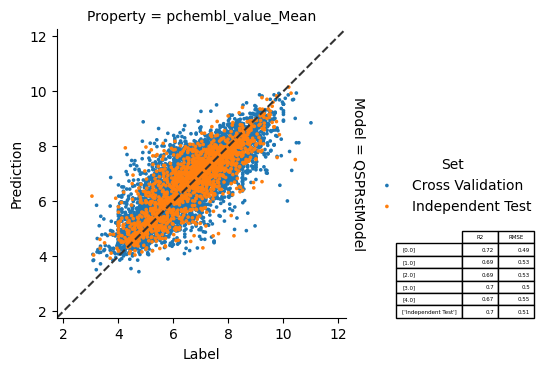

In [ ]:
from qsprpred.plotting.regression import CorrelationPlot
from plotting_regression_MT import CorrelationPlot as CorrelationPlotMod

plot = CorrelationPlotMod([model])
axes, summary = plot.make(save=True, show=True, out_path='/home/s2861704/ppk/test_kin/test_output/QSPRstRFP00533.png')

In [7]:
summary

,Model,Fold,Property,R2,RMSE,Set
0,QSPRstModel,0.0,pchembl_value_Mean,0.719973,0.488782,Cross Validation
1,QSPRstModel,1.0,pchembl_value_Mean,0.688454,0.530217,Cross Validation
2,QSPRstModel,2.0,pchembl_value_Mean,0.692346,0.526293,Cross Validation
3,QSPRstModel,3.0,pchembl_value_Mean,0.699597,0.504011,Cross Validation
4,QSPRstModel,4.0,pchembl_value_Mean,0.671149,0.553482,Cross Validation
5,QSPRstModel,Independent Test,pchembl_value_Mean,0.696105,0.507154,Independent Test
